## Imports

In [1]:
# # Installed
import obspy
import numpy as np
import matplotlib.pyplot as plt

# Local
import madpy.utils.plot_config
import madpy.amplitude as amp
import madpy.duration as dur

In [2]:
st_amp = obspy.read('example.amplitude.mseed', format='MSEED')
for tr in st_amp:
    tr.stats.o = obspy.UTCDateTime('2013-09-01T09:45:36.83')
    tr.stats.p = 6.5944
    tr.stats.s = 10.6356
    tr.stats.elat = 44.58600
    tr.stats.elon = -110.37900
    tr.stats.edep = 2.12
    tr.stats.slat = 44.71550
    tr.stats.slon = -110.67917
    tr.stats.selev = 2.336
    tr.data = tr.data*1e3

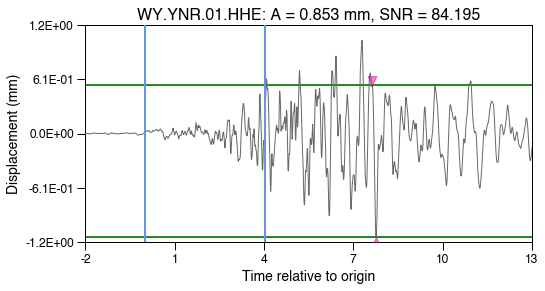

In [3]:
df_amp = amp.measure_amplitude(st_amp.copy())

In [4]:
df_amp.head()

,date,time,event_lat,event_lon,event_depth,station,channel,station_lat,station_lon,station_elev,amplitude,snr
0,2013-09-01,09:45:36.83,44.586,-110.379,2.12,YNR,HHE,44.7155,-110.67917,2.336,0.852588,84.19504


In [5]:
st_dur = obspy.read('example.dur.mseed', format='MSEED')
for tr in st_dur:
    tr.stats.o = obspy.UTCDateTime('2013-09-01T09:45:36.83')
    tr.stats.p = 6.5944
    tr.stats.s = 10.6356
    tr.stats.elat = 44.58600
    tr.stats.elon = -110.37900
    tr.stats.edep = 2.12
    tr.stats.slat = 44.71550
    tr.stats.slon = -110.67917
    tr.stats.selev = 2.336
    tr.detrend('demean')
    tr.taper(max_percentage=0.05)
    tr.filter('bandpass', freqmin=1, freqmax=8)

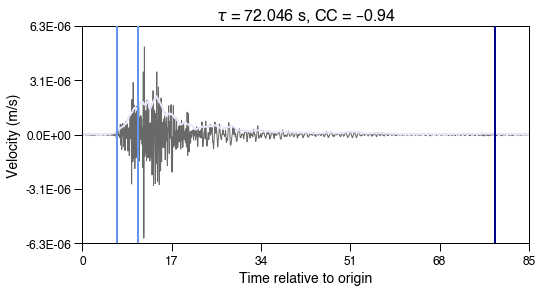

In [6]:
df_dur = dur.measure_duration(st_dur.copy(), 'linear')

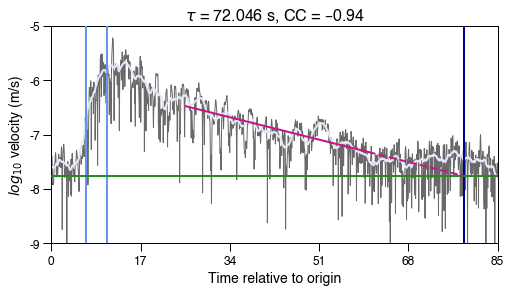

In [7]:
df_dur = dur.measure_duration(st_dur.copy(), 'log')

In [8]:
df_dur.head()

,date,time,event_lat,event_lon,event_depth,station,channel,station_lat,station_lon,station_elev,duration,cc
0,2013-09-01,09:45:36.83,44.586,-110.379,2.12,YNR,HHZ,44.7155,-110.67917,2.336,72.046,-0.936286
